In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [2]:
def eliminar_columna(nombre_columna):
    datos.drop(nombre_columna, axis=1, inplace=True) #se edita df principal

In [3]:
start = time.time()

In [4]:
archivo='ALUMNOS-trainData.csv'

In [5]:
datos=pd.read_csv(archivo)

In [6]:
datos.head()

,Unnamed: 0,date,fligth_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
0,389083,2009-11-09,8995,BBA,SCL,1394,9.0,0,94,2,...,22,19,0,1,0,239,10:30:00,174.0,10631.1,240
1,177073,2009-05-23,7061,LIM,TRU,489,0.0,0,100,4,...,25,0,0,19,9,192,19:20:00,174.0,5453.7,220
2,1040357,2011-05-09,8972,SCL,PUQ,2180,4.0,0,7,1,...,2,0,0,0,10,69,09:54:00,218.0,16161.0,79
3,505258,2010-02-12,6039,CGH,CNF,524,13.0,0,54,4,...,4,0,0,26,0,64,21:00:00,174.0,10828.7,90
4,369663,2009-10-24,7713,GPS,GYE,1170,14.0,0,21,88,...,0,88,1,23,3,183,12:40:00,144.0,16721.6,209


In [7]:
#elimino primera columna ya que no se conoce su significado
datos.drop(columns=datos.columns[0], axis=1, inplace=True)

In [8]:
##binarizo noshow
conditionlist = [
                 (datos['noshow']>=4),
                 (datos['noshow']>=0) & (datos['noshow']<4)    
]
choselist = [1,0]
datos['noshow_b'] = np.select(conditionlist,choselist,default='Not Specified')

In [9]:
#Elimino variables despreciables
eliminar=['fligth_number','out_of_stock','date','departure_time','noshow']
for i in eliminar:
    eliminar_columna(i)

In [10]:
#seleciono variables cat
categorica=datos.iloc[:,[0,1]]

In [11]:
#Realizo OHE para variables categoricas
typeDrop="if_binary"
OHE = OneHotEncoder(drop=typeDrop,sparse=False) 
tempDF=OHE.fit_transform(categorica)

In [12]:
nombreVarOrigCategorical=datos.columns[[0,1]]
nombreVars = ["" for x in range(tempDF.shape[1])]
index=0
indexOrig=0

In [13]:
for i in OHE.categories_:
    if typeDrop=="first":
        for j in range(1,len(i)):
            nombreVars[index]=i[j]
            index+=1
    else:
        if len(i)>2:      
            for j in range(0,len(i)):
                nombreVars[index]=i[j]
                index+=1
        else:
            nombreVars[index]=i[1]
            index+=1
    indexOrig+=1
tempDF=pd.DataFrame(tempDF,columns=nombreVars)


In [14]:
#creo nuevo dataframe listo para utilizar
tempDF

,ADZ,AEP,AGT,AJU,AKL,ANF,AQP,ARI,ASU,AUA,...,UNA,USH,VCP,VIX,VUP,VVI,YYZ,ZAL,ZCO,ZOS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Uniendo con el dataset anterior
tempDF=pd.concat([tempDF, datos.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]], axis=1)



In [16]:
#se crea una muestra aleatoria de 500.000 datos
tempDF = tempDF.sample(500000)

In [17]:
#division train test con particion 80/20
X_train, X_test, y_train, y_test = train_test_split(tempDF.iloc[:,0:tempDF.shape[1]-1],
                                                    tempDF.iloc[:,tempDF.shape[1]-1],
                                                    test_size=0.2,
                                                    random_state=42)

# Inicio modelo básico

In [18]:
#Creando un objeto Arbol de decisión con las condiciones iniciales
from sklearn.tree import DecisionTreeClassifier
modelo= DecisionTreeClassifier()
AD = modelo.fit(X_train,y_train)

In [19]:
#Aplicando el modelo a otros datos
resultado=AD.predict(X_test)

df=pd.DataFrame({'NoshowReal' : y_test, 'NoshowPrediccion' : resultado},dtype=str)


In [20]:
y_test.to_frame()

,noshow_b
53770,1
836390,0
726151,0
99698,1
493711,1
...,...
505071,1
962038,1
670129,1
673512,1


In [21]:
#Interpreto matriz de confusion
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, resultado).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  15842 
False positives:  18569 
False negatives:  19689 
True Positives:  45900


In [22]:
#imprimo scoring para modelo básico
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = resultado,
            normalize = True
           )
print(f"Accuracy de test es: {100 * accuracy} %")
print('Precision: ', precision_score(y_test, resultado,pos_label='0'))
print('Recall: ', recall_score(y_test, resultado,pos_label='0'))

Accuracy de test es: 61.742 %
Precision:  0.445864174945822
Recall:  0.4603760425445352


In [23]:
f=f1_score(y_test, resultado,labels=[0,1],average="binary",pos_label='0')
print(f'F1-Score: {f}')

F1-Score: 0.4530039175316691


# Proceso pruning

In [24]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


In [25]:
#creo objeto kfold y utilizo f1_score como método de scoring
cv=KFold(n_splits=10)
scorer = make_scorer(f1_score, pos_label='0')

/home/vicente/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
/home/vicente/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


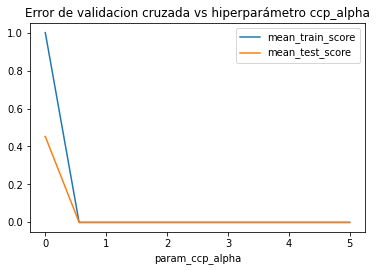

In [26]:
#Optimizo hiperparametros y hago nuevo entrenamiento con valores obtenidos, esperando que el scoring mejore

# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = scorer,
        cv         = cv,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [27]:
#se hace la mejor estimacion con los hiperametros obtneidos arriba
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")


Profundidad del árbol: 69
Número de nodos terminales: 83471


In [28]:
#Evaluo scoring del nuevo arbol


predicciones = modelo_final.predict(X = X_test)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")
print('Precision: ', precision_score(y_test, predicciones,pos_label='0'))
print('Recall: ', recall_score(y_test, predicciones,pos_label='0'))

El accuracy de test es: 61.88 %
Precision:  0.4475670785150838
Recall:  0.4600273168463573


In [29]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicciones).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  15830 
False positives:  18581 
False negatives:  19539 
True Positives:  46050


In [30]:
f=f1_score(y_test, predicciones,labels=[0,1],average="binary",pos_label='0')
print(f'F1-Score: {f}')

F1-Score: 0.4537116652335913


In [31]:
end = time.time()
tiempo=end-start
print(f'Tiempo en ejecutar: {tiempo/60} minutos')

Tiempo en ejecutar: 48.89276525576909 minutos
